 Dates not sorted — fixing automatically
Cumulative Asset Return   : 2.72
Cumulative Strategy Return: 2.13


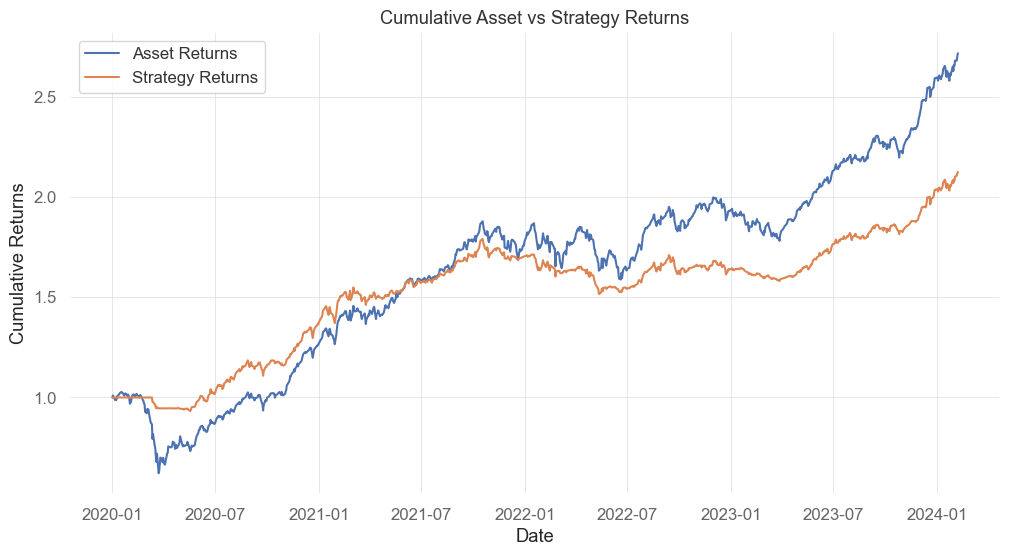

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-03-12   2020-03-12
End Period                 2024-02-07   2024-02-07
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       99.0%

Cumulative Return          213.94%      112.67%
CAGR﹪                     34.57%       21.63%

Sharpe                     1.58         1.9
Prob. Sharpe Ratio         99.74%       99.98%
Smart Sharpe               1.51         1.82
Sortino                    2.13         2.75
Smart Sortino              2.03         2.63
Sortino/√2                 1.5          1.94
Smart Sortino/√2           1.44         1.86
Omega                      1.4          1.4

Max Drawdown               -28.24%      -15.36%
Max DD Date                2020-03-23   2022-05-13
Max DD Period Start        2020-03-12   2021-10-19
Max DD Period End          2020-06-19   2023-07-18
Longest DD Days            298          638
Volat

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-10-19,2022-05-13,2023-07-18,638,-15.361772,-14.673817
2,2020-03-12,2020-05-18,2020-06-04,85,-6.831800,-6.100839
3,2020-08-31,2020-09-24,2020-11-04,66,-6.476388,-4.593604
4,2021-01-14,2021-01-29,2021-02-02,20,-5.758372,-4.690387
5,2021-03-04,2021-03-25,2021-06-01,90,-5.635936,-4.685550


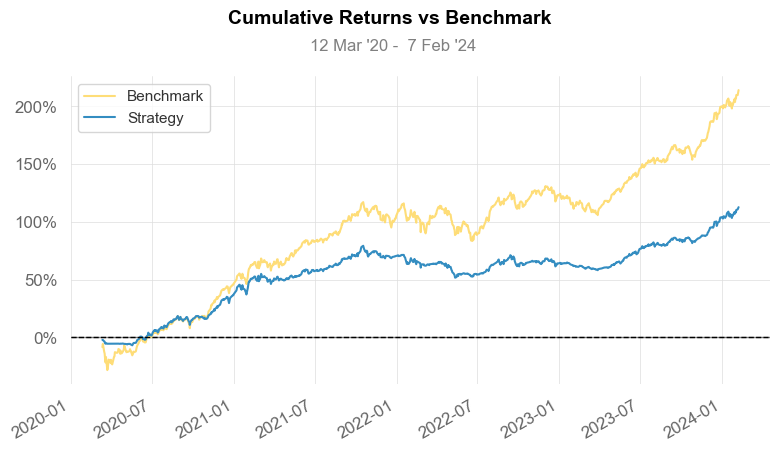

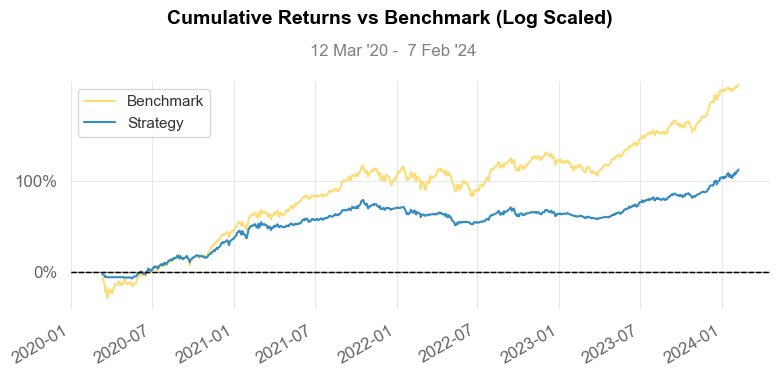

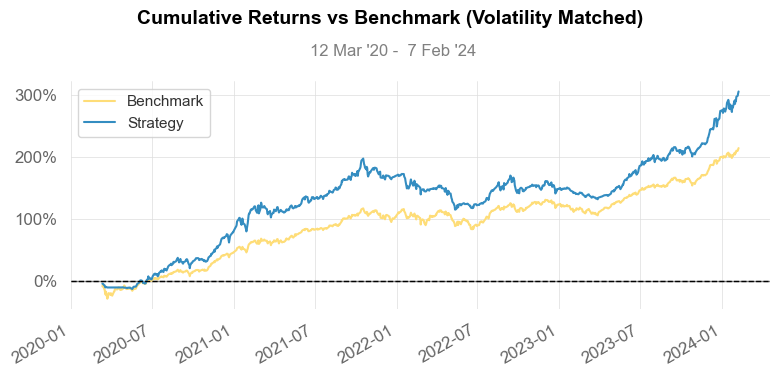

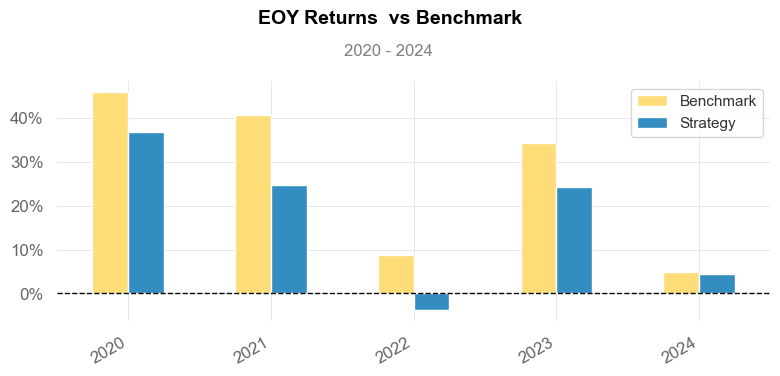

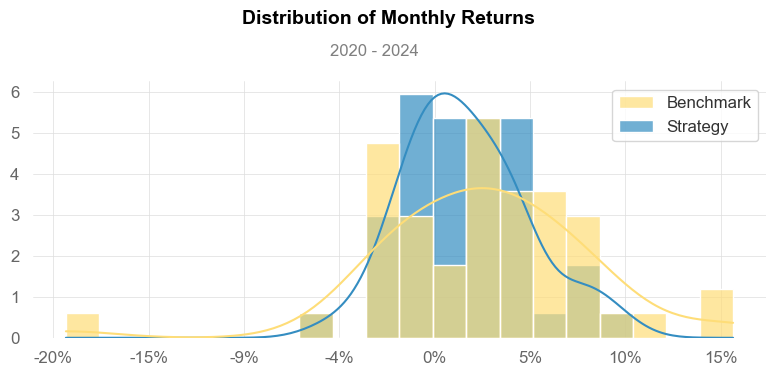

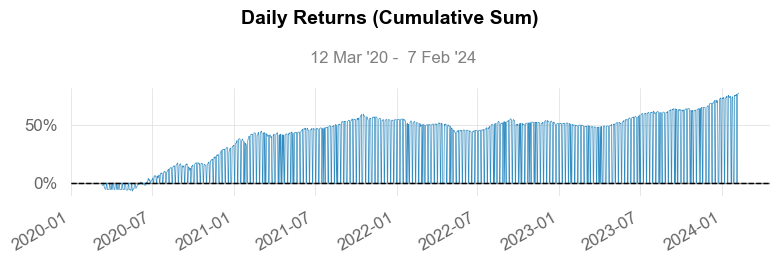

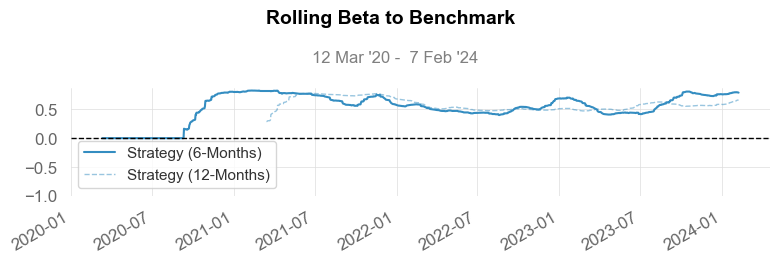

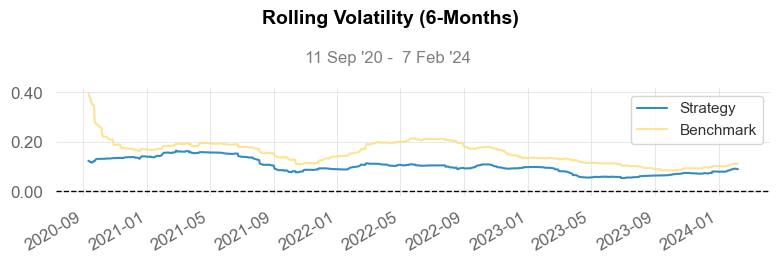

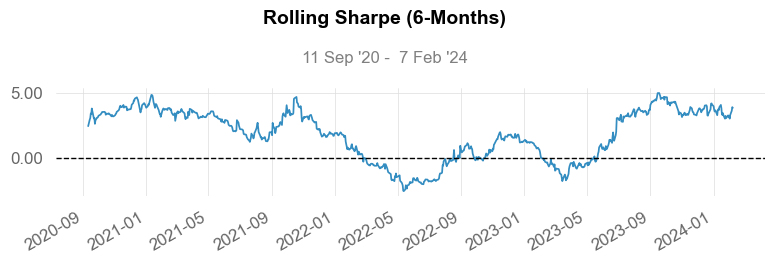

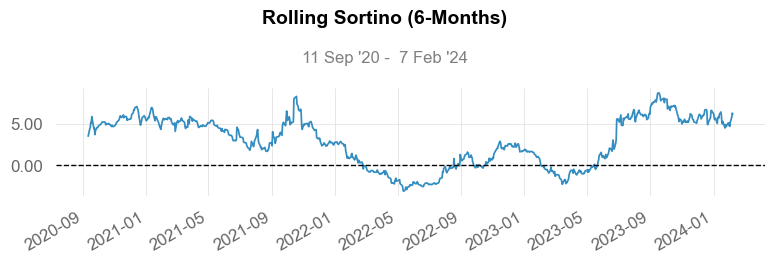

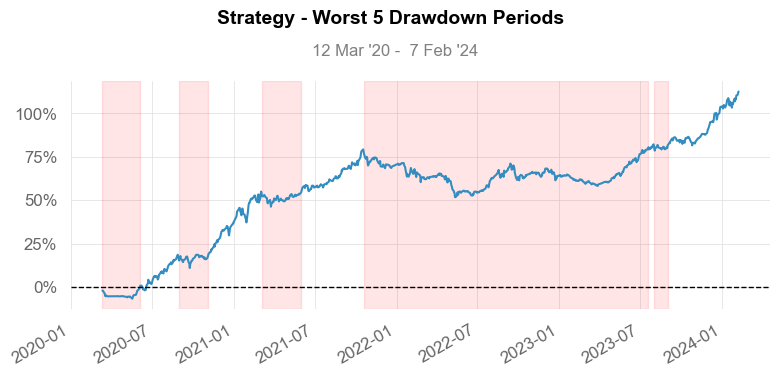

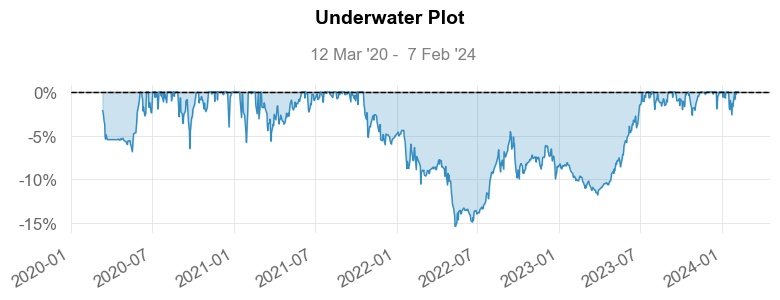

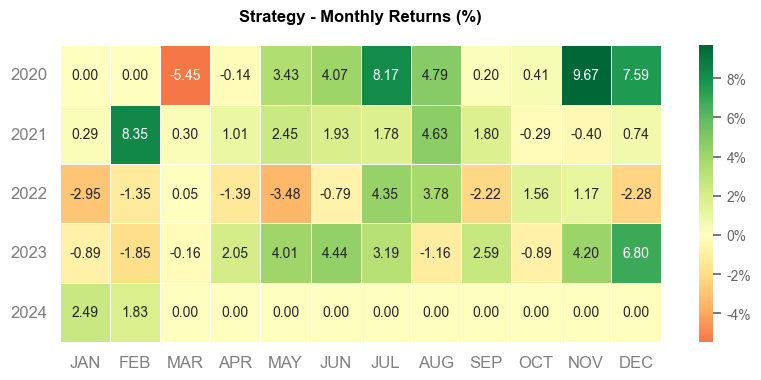

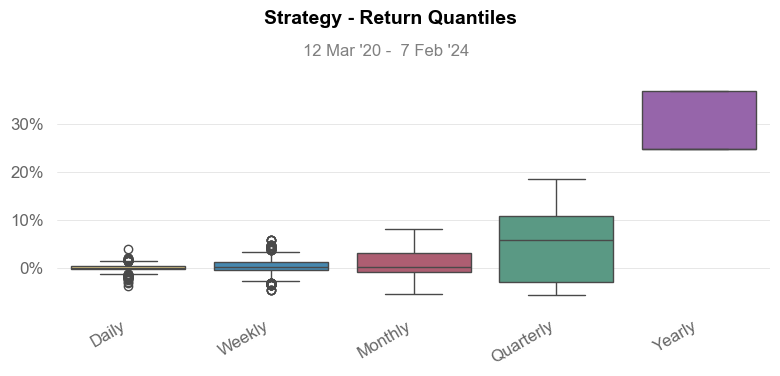

Excel output saved successfully: C:\Users\Swarupa\Downloads\strategy_output1.xlsx


In [3]:
# =====================================================
# IMPORT LIBRARIES
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs

# =====================================================
# FILE PATHS
# =====================================================
INPUT_FILE  = r"C:\Users\Swarupa\Downloads\50 comp data (input file).xlsx"  
OUTPUT_FILE = r"C:\Users\Swarupa\Downloads\strategy_output1.xlsx"

# =====================================================
# DATE RANGE 
# =====================================================
START_DATE = "2020-01-01"
END_DATE   = "2024-02-07"
# =====================================================
# SAFE DATA LOADER FUNCTION
# =====================================================
def load_and_filter_excel(file_path, date_col, start_date, end_date):
    df = pd.read_excel(file_path)

    # Convert date column safely
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Drop invalid dates
    df = df.dropna(subset=[date_col])

    # Set index
    df.set_index(date_col, inplace=True)

    # Ensure sorted DatetimeIndex
    if not df.index.is_monotonic_increasing:
        print(" Dates not sorted — fixing automatically")
        df.sort_index(inplace=True)

    # Apply date filter
    df = df.loc[start_date:end_date]

    return df

# =====================================================
# LOAD DATA
# =====================================================
df = load_and_filter_excel(
    INPUT_FILE,
    date_col="DATE",
    start_date=START_DATE,
    end_date=END_DATE
)

# =====================================================
# IDENTIFY STOCK COLUMNS
# =====================================================
stocks = df.columns

# =====================================================
# DAILY RETURNS
# =====================================================
returns = df.pct_change()

# =====================================================
# TREND STRENGTH STRATEGY 
# =====================================================
strategy_returns = pd.DataFrame(index=df.index)

for stock in stocks:
    price = df[stock]

    ma_20  = price.rolling(20).mean()
    ma_50 = price.rolling(50).mean()

    signal = (ma_20 > ma_50).astype(int)
    position = signal.shift(1)   

    strategy_returns[stock] = position * returns[stock]

# =====================================================
# PORTFOLIO RETURNS 
# =====================================================
df['Asset_Return'] = returns.mean(axis=1)
df['Strategy_Return'] = strategy_returns.mean(axis=1)

# Keep all dates
df[['Asset_Return', 'Strategy_Return']] = (
    df[['Asset_Return', 'Strategy_Return']].fillna(0)
)

# =====================================================
# CUMULATIVE RETURNS
# =====================================================
df['Cumulative_Asset_Return'] = (1 + df['Asset_Return']).cumprod()
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()

# =====================================================
# PRINT FINAL RETURNS
# =====================================================
print("Cumulative Asset Return   :", round(df['Cumulative_Asset_Return'].iloc[-1], 2))
print("Cumulative Strategy Return:", round(df['Cumulative_Strategy_Return'].iloc[-1], 2))

# =====================================================
# PLOT CUMULATIVE RETURNS
# =====================================================
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Asset_Return'], label='Asset Returns')
plt.plot(df.index, df['Cumulative_Strategy_Return'], label='Strategy Returns')
plt.title("Cumulative Asset vs Strategy Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

# =====================================================
# QUANTSTATS PERFORMANCE METRICS
# =====================================================
qs.extend_pandas()

qs.reports.full(
    df['Strategy_Return'],
    benchmark=df['Asset_Return'],
    title="Trend Strength Strategy (Stocks)"
)

# =====================================================
# SAVE OUTPUT TO EXCEL
# =====================================================
with pd.ExcelWriter(OUTPUT_FILE, engine='xlsxwriter') as writer:
    df[
        [
            'Asset_Return',
            'Strategy_Return',
            'Cumulative_Asset_Return',
            'Cumulative_Strategy_Return'
        ]
    ].to_excel(writer, sheet_name='Results')

print("Excel output saved successfully:", OUTPUT_FILE)


C:\Users\Swarupa\AppData\Local\Temp\2\ipykernel_4344\3861362099.py:63: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change()


Cumulative Asset Return   : 1.25
Cumulative Strategy Return: 1.09


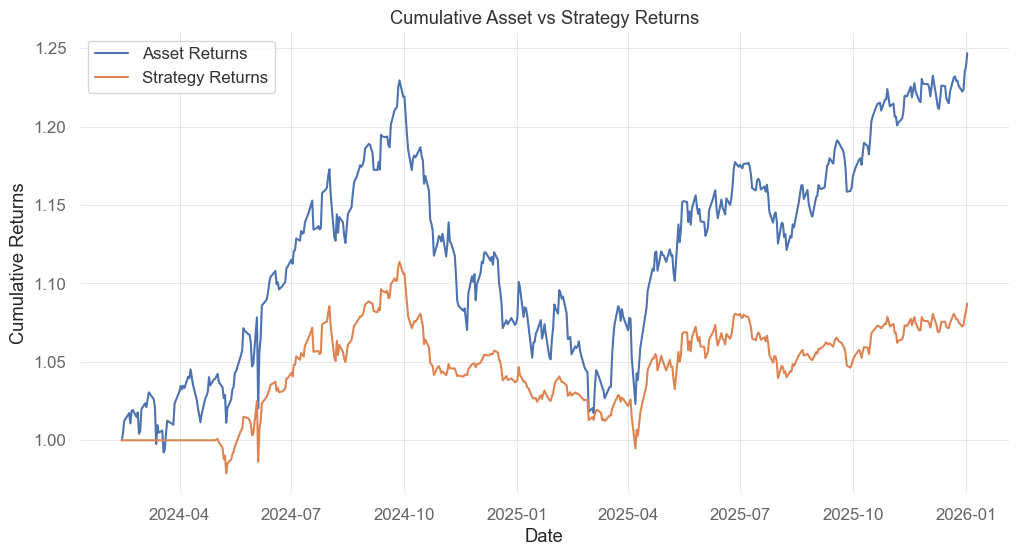

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2024-05-02   2024-05-02
End Period                 2026-01-02   2026-01-02
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          19.97%       8.72%
CAGR﹪                     11.57%       5.16%

Sharpe                     0.9          0.65
Prob. Sharpe Ratio         87.27%       79.65%
Smart Sharpe               0.81         0.59
Sortino                    1.29         0.92
Smart Sortino              1.16         0.83
Sortino/√2                 0.91         0.65
Smart Sortino/√2           0.82         0.58
Omega                      1.13         1.13

Max Drawdown               -17.25%      -10.68%
Max DD Date                2025-03-04   2025-04-07
Max DD Period Start        2024-09-30   2024-09-30
Max DD Period End          2025-11-25   2026-01-02
Longest DD Days            422          460
Volat

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-09-30,2025-04-07,2026-01-02,460,-10.682867,-9.063114
2,2024-06-04,2024-06-04,2024-06-07,4,-3.776788,-1.718451
3,2024-08-02,2024-08-14,2024-08-29,28,-3.279148,-3.213024
4,2024-05-03,2024-05-09,2024-05-17,15,-2.193605,-1.551287
5,2024-07-19,2024-07-24,2024-07-25,7,-1.584790,-1.491385


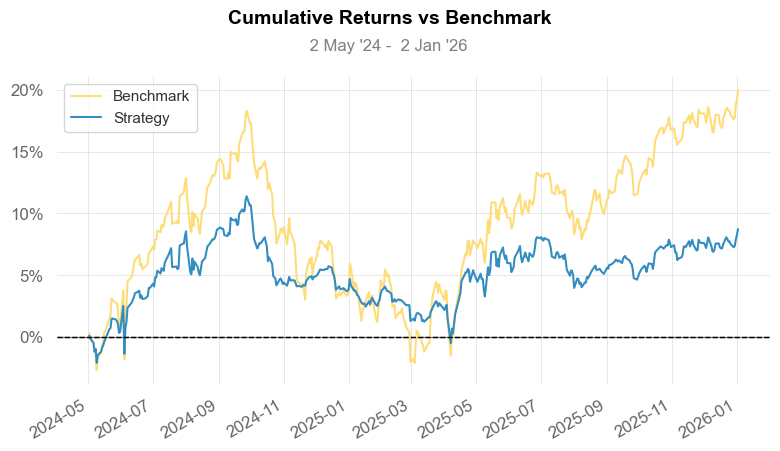

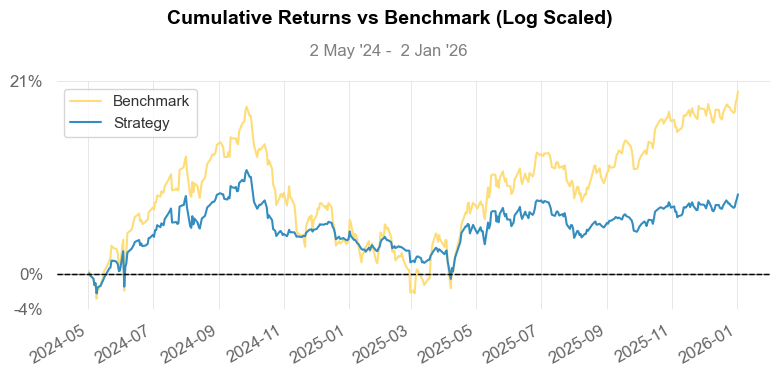

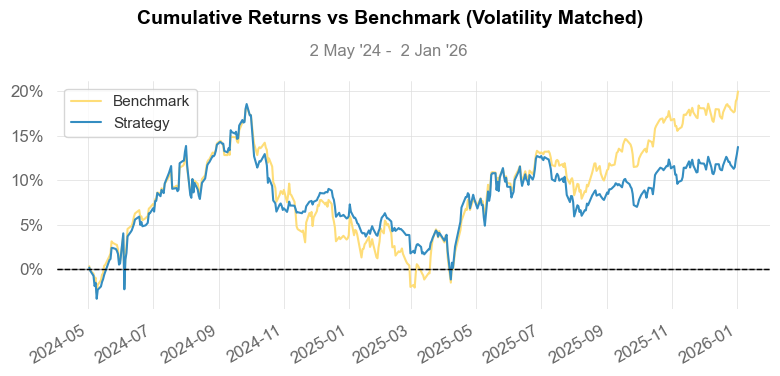

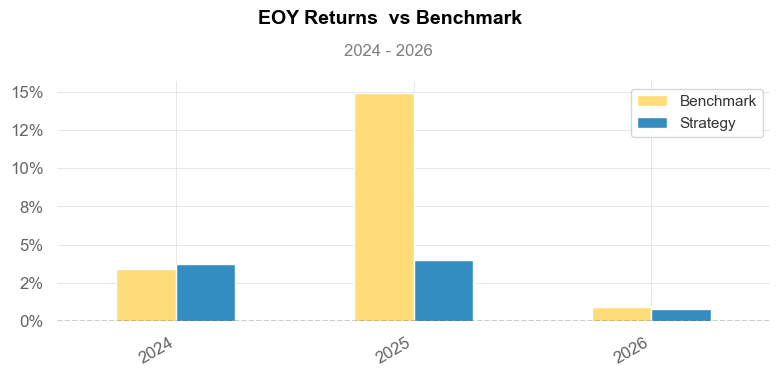

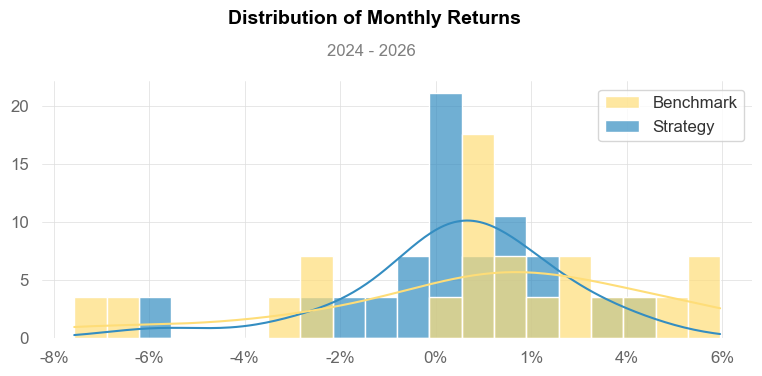

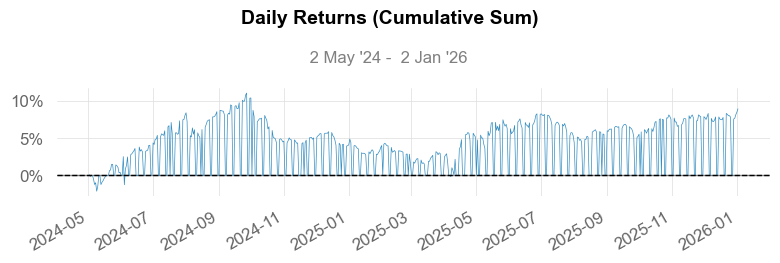

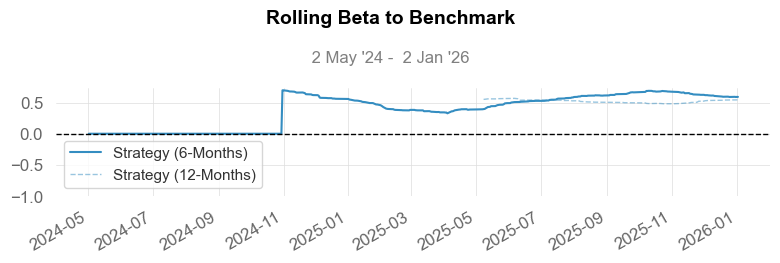

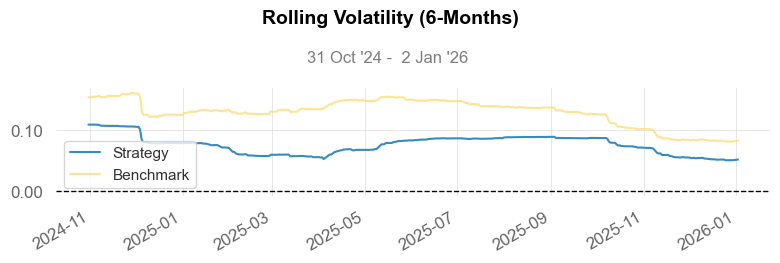

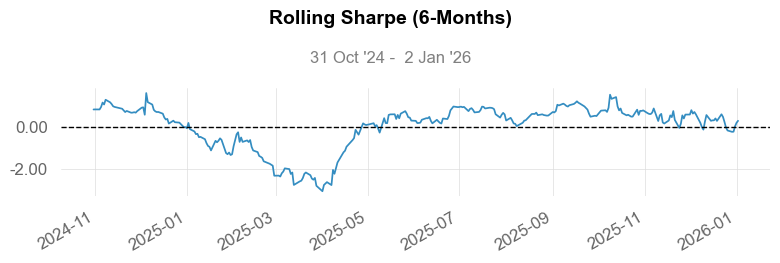

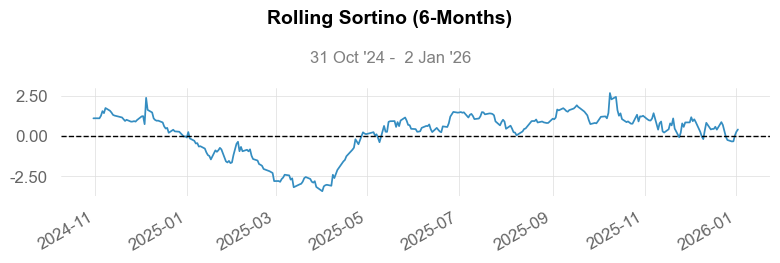

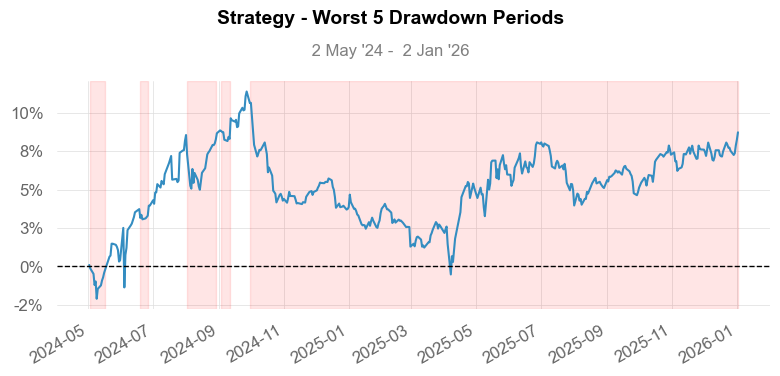

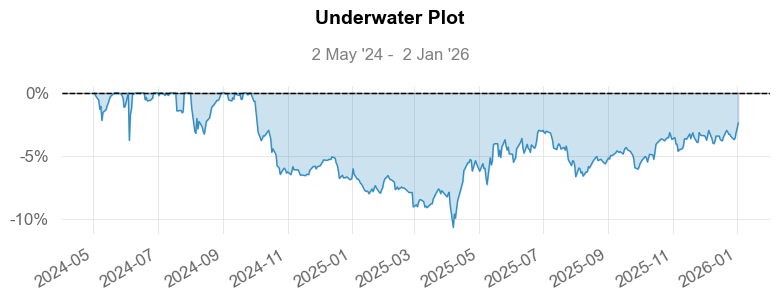

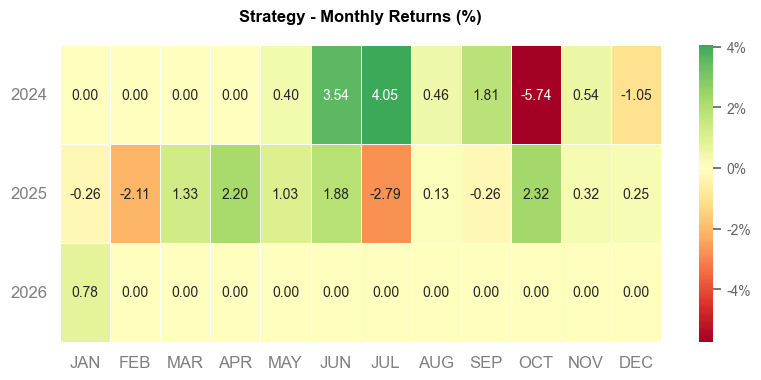

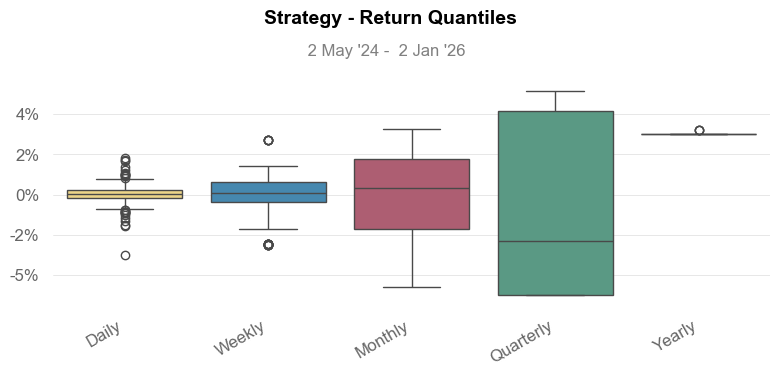

Excel output saved successfully: C:\Users\Swarupa\Downloads\strategy_output2.xlsx


In [4]:
# =====================================================
# IMPORT LIBRARIES
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs

# =====================================================
# FILE PATHS
# =====================================================
INPUT_FILE  = r"D:\feb24_to_jan26\NIFTY50_CLOSE_MASTER.xlsx"  
OUTPUT_FILE = r"C:\Users\Swarupa\Downloads\strategy_output2.xlsx"

# =====================================================
# DATE RANGE 
# =====================================================
START_DATE = "2024-02-14"
END_DATE   = "2026-01-02"
# =====================================================
# SAFE DATA LOADER FUNCTION
# =====================================================
def load_and_filter_excel(file_path, date_col, start_date, end_date):
    df = pd.read_excel(file_path)

    # Convert date column safely
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Drop invalid dates
    df = df.dropna(subset=[date_col])

    # Set index
    df.set_index(date_col, inplace=True)

    # Ensure sorted DatetimeIndex
    if not df.index.is_monotonic_increasing:
        print(" Dates not sorted — fixing automatically")
        df.sort_index(inplace=True)

    # Apply date filter
    df = df.loc[start_date:end_date]

    return df

# =====================================================
# LOAD DATA
# =====================================================
df = load_and_filter_excel(
    INPUT_FILE,
    date_col="DATE",
    start_date=START_DATE,
    end_date=END_DATE
)

# =====================================================
# IDENTIFY STOCK COLUMNS
# =====================================================
stocks = df.columns

# =====================================================
# DAILY RETURNS
# =====================================================
returns = df.pct_change()

# =====================================================
# TREND STRENGTH STRATEGY 
# =====================================================
strategy_returns = pd.DataFrame(index=df.index)

for stock in stocks:
    price = df[stock]

    ma_20  = price.rolling(20).mean()
    ma_50 = price.rolling(50).mean()

    signal = (ma_20 > ma_50).astype(int)
    position = signal.shift(1)   

    strategy_returns[stock] = position * returns[stock]

# =====================================================
# PORTFOLIO RETURNS 
# =====================================================
df['Asset_Return'] = returns.mean(axis=1)
df['Strategy_Return'] = strategy_returns.mean(axis=1)

# Keep all dates
df[['Asset_Return', 'Strategy_Return']] = (
    df[['Asset_Return', 'Strategy_Return']].fillna(0)
)

# =====================================================
# CUMULATIVE RETURNS
# =====================================================
df['Cumulative_Asset_Return'] = (1 + df['Asset_Return']).cumprod()
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()

# =====================================================
# PRINT FINAL RETURNS
# =====================================================
print("Cumulative Asset Return   :", round(df['Cumulative_Asset_Return'].iloc[-1], 2))
print("Cumulative Strategy Return:", round(df['Cumulative_Strategy_Return'].iloc[-1], 2))

# =====================================================
# PLOT CUMULATIVE RETURNS
# =====================================================
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Asset_Return'], label='Asset Returns')
plt.plot(df.index, df['Cumulative_Strategy_Return'], label='Strategy Returns')
plt.title("Cumulative Asset vs Strategy Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

# =====================================================
# QUANTSTATS PERFORMANCE METRICS
# =====================================================
qs.extend_pandas()

qs.reports.full(
    df['Strategy_Return'],
    benchmark=df['Asset_Return'],
    title="Trend Strength Strategy (Stocks)"
)

# =====================================================
# SAVE OUTPUT TO EXCEL
# =====================================================
with pd.ExcelWriter(OUTPUT_FILE, engine='xlsxwriter') as writer:
    df[
        [
            'Asset_Return',
            'Strategy_Return',
            'Cumulative_Asset_Return',
            'Cumulative_Strategy_Return'
        ]
    ].to_excel(writer, sheet_name='Results')

print("Excel output saved successfully:", OUTPUT_FILE)
